# Trabalho 1 - Modelagem e Avaliação de Desempenho

* Francisco Taam - 119150156
* Felipe Vidal Cantor Bourbon - 119166775
* Lucas Araujo Carvalho - 1191187632
* Lucas Moreno Silva - 11940949
* Pedro Ancelmo de Aquino Vieira Amaral - 119189189

enunciado do trabalho [neste link](https://www.overleaf.com/read/jrykyybwrvsb)

In [189]:
# Import helpers
from helpers import *
import matplotlib.pyplot as plt
import numpy as np

## Main code

In [190]:
def simulate(_lambda, _mu, total_time = 10, total_rounds = 1, deterministic=False):
  forest = []
  finite_trees = 0

  for _ in range(total_rounds):
    event_queue = Queue()
    tree = Tree()

    # Initialize the first events
    arrival_time = arrival_dist(_lambda)
    departure_time = departure_dist(_mu, deterministic)
    event_queue.push((TYPES[0], arrival_time))
    event_queue.push((TYPES[1], departure_time))

    # Main loop
    while True:
      event = event_queue.pop() # takes the next event from the queue
      tree.current_time = event[1] # gets the time of the event

      if tree.current_time > total_time:
        break

      if event[0] == TYPES[0]:
        tree.arrive_client()
        arrival_time = tree.current_time + arrival_dist(_lambda)
        event_queue.push((TYPES[0], arrival_time))

      elif event[0] == TYPES[1]:
        tree.next_server()
        departure_time = tree.current_time + departure_dist(_mu, deterministic)
        event_queue.push((TYPES[1], departure_time))

      if tree.current == None:
        finite_trees += 1
        break

    forest.append(tree)
  
  return forest, finite_trees


In [191]:
def calculate_metrics(LAMBDA, MU, TOTAL_TIME, TOTAL_ROUNDS, DETERMINISTIC):
  forest, finite_trees = simulate(LAMBDA, MU, TOTAL_TIME, TOTAL_ROUNDS, DETERMINISTIC)
  pdf = {}
  mean_root_outdegree = 0
  mean_max_outdegree = 0
  mean_tree_height = 0
  mean_node_height = 0
  node_count = 0
  mean_busy_period = 0
  mean_num_clients = 0

  # Calculating the metrics
  for tree in forest:
    # Add each value of tree.get_child_count() to the pdf
    for child_count in tree.get_child_count():
      if child_count in pdf:
        pdf[child_count] += 1
      else:
        pdf[child_count] = 1

    # Add the mean root outdegree
    mean_root_outdegree += tree.get_root_outdegree()

    # Add the mean max outdegree
    mean_max_outdegree += tree.get_max_outdegree()

    # Add the mean tree height
    mean_tree_height += tree.get_height()[0]

    # Add the mean node height
    mean_node_height += sum(tree.get_height())
    node_count += tree.num_nodes+1

    # Add the mean busy period
    mean_busy_period += tree.current_time if tree.current_time <= TOTAL_TIME else 0

    # Add the number of clients
    mean_num_clients += tree.num_nodes+1

  return finite_trees, pdf, mean_root_outdegree/len(forest), mean_max_outdegree/len(forest), \
          mean_tree_height/len(forest), mean_node_height/node_count, mean_busy_period/len(forest), mean_num_clients/len(forest)

Fraction of trees that end => 1.0

Mean root outdegree => 0.3

Mean max outdegree => 0.3

Mean tree height => 0.4

Mean node height => 0.35714285714285715

Mean busy period => 0.7469106392896945

Mean number of clients => 1.4

CDF:


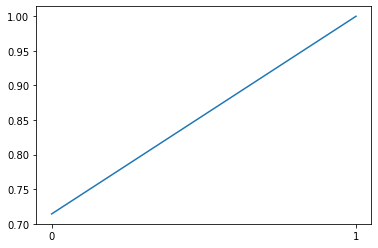

In [198]:
# Parameters
LAMBDA = 1
MU = 2
TOTAL_TIME = 10
TOTAL_ROUNDS = 10
DETERMINISTIC = False

# Calculate the metrics
finite_trees, pdf, mean_root_outdegree, mean_max_outdegree, mean_tree_height, mean_max_tree_height, mean_busy_period, mean_num_clients = \
                                                                    calculate_metrics(LAMBDA, MU, TOTAL_TIME, TOTAL_ROUNDS, DETERMINISTIC)

# Print the fraction of finite trees
print(f"Fraction of trees that end => {finite_trees / TOTAL_ROUNDS}\n")

# Print the mean root outdegree
print(f"Mean root outdegree => {mean_root_outdegree}\n")

# Print the mean max outdegree
print(f"Mean max outdegree => {mean_max_outdegree}\n")

# Print the mean tree height
print(f"Mean tree height => {mean_tree_height}\n")

# Print the mean node height
print(f"Mean node height => {mean_max_tree_height}\n")

# Print the mean busy period
print(f"Mean busy period => {mean_busy_period}\n")

# Print the mean number of clients
print(f"Mean number of clients => {mean_num_clients}\n")

# Plot the cdf
print("CDF:")
keys = range(min(pdf.keys()), max(pdf.keys())+1)
for i in keys:
  pdf[i] = pdf[i] if i in pdf else 0

cdf = np.cumsum(list(pdf.values()))
cdf = cdf/ max(cdf)
plt.plot(keys, cdf)
plt.xticks(keys)
plt.show()